
# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


> This is a dataset of information collected
from 100k medical appointments in
Brazil.The dataset shows if the patient showed up for an scheduled appointment or not.The attributes of this data set are as follows. 

|Name            |   Description                                                                                              |
|:---------------|:------------|
|Patient         | Indicates the patient identification                                                                       |
|AppointmentID   | Identifies the appointment                                                                                 |
|Gender          | The gender of the patient. Either "F" for Female or "M" for male                                           |
|ScheduledDay    | Shows the day the patient set up their appointment                                                         | 
|AppointmentDay  | The day of the actual appointment                                                                          |
|Age             | Shows the age of the patient                                                                               |
|Neighbourhood   | Shows the location of the hospital
|Scholarship     | Indicates whether or not the patient is enrolled in Brasilian welfare program.This is Represented by 0and 1|
|Hypertension    | Shows patient with Hypertension. Represented by 1 or 0
|Diabetes        | Shows patient who is Diabetic. Represented by 1 or 0
|Alcoholism      | Shows patient who is an alcoholic. Represented by 1 or 0
|Handcap         | Shows patient who is handicapped. Represented by 1 or 0
|SMS_received    | Shows if patient recieved messages or not
|No-show         | Shows ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.




### Question(s) for Analysis

> The purpose of this dataset analysis is to answer the following questions

><ol>
 <li>What is the comparison between of patient's age to the appointments attendances. </li>
 <li>What is the percentage of patients who did not show up for appointments.</li>
 <li>How is the appointment attendace distributed in terms of gender. </li>
></ol>

In [4]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling
> Performed data loading,assessment and cleanliness of data in readiness for data analysis in this section.


### General Properties

In [5]:
# Loading data from csv file
df_noshow = pd.read_csv('noshow.csv')

#Diplaying the first 5 rows of dataset
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Total no of rows and columns
df_noshow.shape

(110527, 14)

*110527 rows and 14 columns*

In [4]:
#checking for missing values
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


*There are no missing values since non-null entries in every column is equal to the total no of rows*

In [6]:
#Finding duplicte rows
df_noshow.duplicated().sum()

0

*The result show no duplicate rows in this dataset*

In [7]:
# No of duplicated ids
df_noshow['PatientId'].duplicated().sum()

48228

*There are 48228 duplicate ids in the patient ID column of this data set*

In [8]:
#How many same patients did not show up
df_noshow.duplicated(['PatientId','No-show']).sum()

38710

*There are 38710 duplicates with same id and same no-show status*

In [9]:
#finding any incorrect data type
df_noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

*The ScheduledDay and AppointmentDay takes string data type instead of datetime*


In [10]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*The minimun age has a negative value meaning a record in dataset has a the negative age value*

In [11]:
# There is a negative age   
df_noshow[df_noshow.eq(-1).any(1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


*The above result shows that row index 99832 has the negative value for age, which will be eliminated in the next section to avoid any outliers*

### Data Cleaning
> From the assessment above some data would need to be cleaned in order to perform data analysis.The following needs to be addressed

> <ul>
  <li>Renaming the column names</li>
  <li>Removing a negative value in age column</li>
 <li>Correcting the data type for scheduled_day and appointment_day</li>
> </ul>

In [6]:
# Correcting and unifying column names
df_noshow.columns = ['patient_id', 'appointment_id', 'gender', 'scheduled_day', 
              'appointment_day', 'age', 'neighbourhood', 'scholarship', 'hypertension',
              'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show']
df_noshow.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# Removing the duplicated ids and no show status
df_noshow.drop_duplicates(['patient_id','no_show'], inplace=True)
df_noshow.shape

(71817, 14)

*The new number of columns is 71817 and rows is 14*

In [8]:
# Eliminating the row with negative value for age
df_noshow.drop(index=99832,inplace=True)

In [9]:
df_noshow.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,7.181600e+04,7.181600e+04,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000,71816.000000
mean,1.466249e+14,5.666493e+06,36.527501,0.095536,0.195068,0.070959,0.025036,0.020135,0.335566
std,2.544917e+14,7.313083e+04,23.378262,0.293956,0.396256,0.256758,0.156236,0.155338,0.472191
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.175956e+12,5.631622e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.189425e+13,5.672882e+06,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.457487e+13,5.716567e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*The negtive value has been eliminated and the new minimu age is 0*

In [21]:
#fixing the schedule and appointment day data type
df_noshow['scheduled_day'] = pd.to_datetime(df_noshow['scheduled_day'])
df_noshow['appointment_day'] = pd.to_datetime(df_noshow['appointment_day'])
df_noshow.dtypes

patient_id                     float64
appointment_id                   int64
gender                          object
scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
age                              int64
neighbourhood                   object
scholarship                      int64
hypertension                     int64
diabetes                         int64
alcoholism                       int64
handicap                         int64
sms_received                     int64
no_show                         object
dtype: object

*The new data type for scheduled_day  and appointment_day is datetime*

In [10]:
# No of patients that Showed up 
showed=df_noshow['no_show']=="No"
df_noshow[showed].count()

patient_id         54153
appointment_id     54153
gender             54153
scheduled_day      54153
appointment_day    54153
age                54153
neighbourhood      54153
scholarship        54153
hypertension       54153
diabetes           54153
alcoholism         54153
handicap           54153
sms_received       54153
no_show            54153
dtype: int64

*There are 54153 patients who showed up for their appointments*

In [11]:
# Did not show up numbers
noshow=df_noshow['no_show']=="Yes"
df_noshow[noshow].count()

patient_id         17663
appointment_id     17663
gender             17663
scheduled_day      17663
appointment_day    17663
age                17663
neighbourhood      17663
scholarship        17663
hypertension       17663
diabetes           17663
alcoholism         17663
handicap           17663
sms_received       17663
no_show            17663
dtype: int64

*There are 17663 patients who did not show up for their appointments*

<a id='eda'></a>
## Exploratory Data Analysis




### General Observation

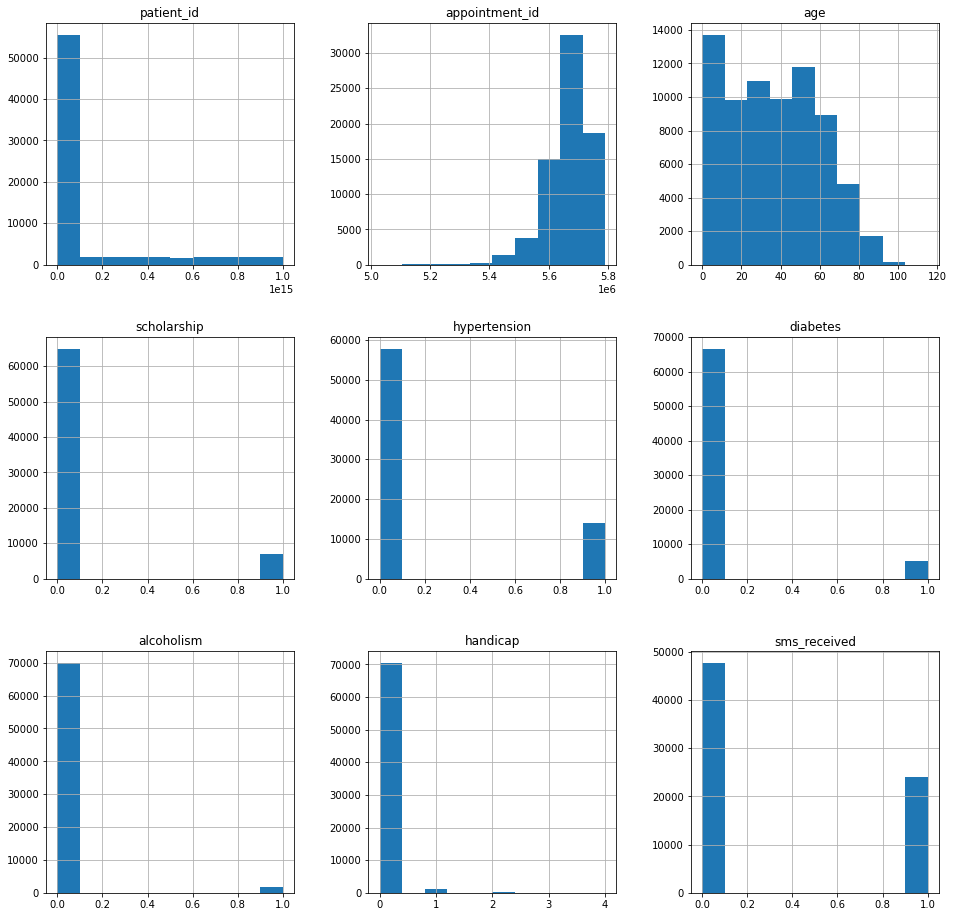

In [17]:
df_noshow.hist(figsize=(16,16));

> Observations from the charts
> * age: Patients are between the age of 0 to 100 and most of them are young people evenly distributed between age 0 to 50 and drastically decrease from age of 60 years.
> * alcoholism: Few patients are  alcoholics.
> * diabetes: Few patients are diabetes but are more than alcoholics.
> * handicap: There are for handicap categories with most of the people not being handicapted.
> * hypertension: Few patients also have hypertension .

### Research Question 1: The comparison of attendances vs the age of the patient

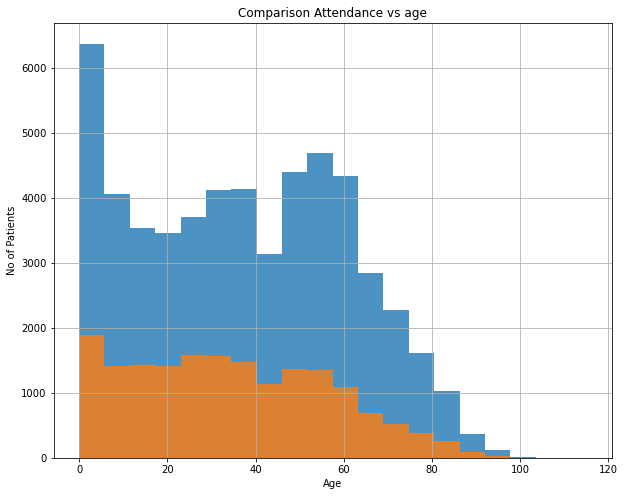

In [39]:
def appointments(df,col_name,showed,noshow):
   plt.figure(figsize=(10,8)) 
   df_noshow.age[showed].hist(alpha=0.8, bins=20,label='Showed');
   df_noshow.age[noshow].hist(alpha=0.8, bins=20, label='No-Show');
   plt.title("Comparison Attendance vs age")
   plt.xlabel("Age")
   plt.ylabel("No of Patients");
   
    
appointments(df_noshow,'age',showed,noshow)

*Children and young people between the age shows up to their appointments are more than older people between 40-60*

*The rate of no-shows between the age of 1-65 years old, seems to be higher than 30%*

### Research Question 2 : What is the percentage of patients who did not show up for appointments

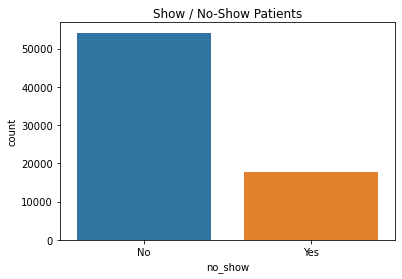

25% of appointments were missed.


In [12]:
def noShow():
    all_appointments=df_noshow.shape[0]
    missed = len(df_noshow.query('no_show == "Yes"'))
    noshow_ratio = int(round(missed/all_appointments*100))

    ax = sns.countplot(x=df_noshow.no_show, data=df_noshow)
    ax.set_title("Appointment attendance")
    plt.show();

    print('{}% of the appointments were missed by patients.'.format(noshow_ratio))

noShow()

### Research Question 3: What is the gender distribution of the no show appointments attendance

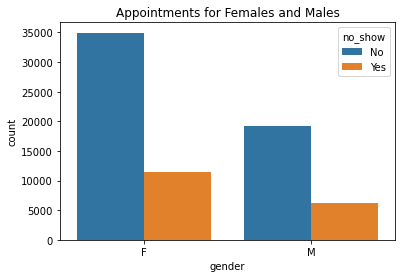

All appointments by females were 46466 and all appointments by male were 25350
Missed appointments by females were 11506 and missed appointments by male were 6157
The ratio of missed appointments by females is 25% and the ratio missed by male is 24%


In [17]:
def appointments():
        appointments_by_female = len(df_noshow.loc[df_noshow['gender'] == "F"])
        appointments_by_male= len(df_noshow.loc[df_noshow['gender'] == "M"])

        missed_by_female = len(df_noshow.query('no_show == "Yes" and gender == "F"'))
        missed_by_male = len(df_noshow.loc[(df_noshow['gender'] == "M") & (df_noshow['no_show'] == "Yes")])

        missed_female_ratio = int(round(missed_by_female/appointments_by_female*100))
        missed_male_ratio = int(round(missed_by_male/appointments_by_male*100))

        ax = sns.countplot(x=df_noshow.gender, hue=df_noshow.no_show, data=df_noshow)
        ax.set_title("Attendance for Females and Males")
        x_labels=['Female', 'Male']
        plt.show();

        print('All appointments by females were {} and all appointments by male were {}'.format(appointments_by_female, appointments_by_male))
        print('Missed appointments by females were {} and missed appointments by male were {}'.format(missed_by_female,missed_by_male))
        print('The ratio of missed appointments by females is {}% and the ratio missed by male is {}%'.format(missed_female_ratio,missed_male_ratio))
       
appointments()    
    

<a id='conclusions'></a>
## Conclusions
<ul>
<li>Insight 1: The patients are 37 years on average, the youngest at 0 and oldest at 155.
    Children and young people shows up to their appointments are more than older people between 40-60.
    The rate of no-shows between the age of 1-65 years old, the rate of no-shows seems to be higher than 30%. </li>
<li>Insight 2: 25% of the appointments were missed by the patients</li>
<li>Insight 3: </li>
    
 * For Female patients: The total number of appointments is 46466, the missed appointments 11506. The percentage of missed   appointments is 25%.
 * For Male patients:The total number of appointments is 25350, the missed appointments 6157. The percentage of missed   appointments is 24%.
    
* Hence, more female than male patients missed their appointments
    
</ul>

### Limitations
One of the limitation in this data set is lack of patient's background data, like their average income and also the cost of the appointments which may be the main factor to no shows in appointments. 